In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gaussian_elemination(A, b):
    n = len(b)
    for i in range(n):
        for j in range(i+1, n):
            ratio = A[j][i] / A[i][i]
            A[j] -= ratio * A[i]
            b[j] -= ratio * b[i]
            print(A, b)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i][i+1:], x[i+1:])) / A[i][i]
    return x

In [3]:
def gaussian_elimination_rref_square(A, b):
    #square matrix only
    n = len(b)
    A_copy = A.copy()
    b_copy = b.copy()
    A_copy = np.hstack((A_copy, b_copy))
    np.set_printoptions(precision=3)
    for i in range(n):
        # Forward elimination
        for j in range(i+1, n):
            ratio = A_copy[j][i] / A_copy[i][i]
            A_copy[j] -= ratio * A_copy[i]
            # b_copy[j] -= ratio * b_copy[i]
            # print("first: \n{0}".format(A_copy))
        # Backward elimination
        for j in range(i-1, -1, -1):
            ratio = A_copy[j][i] / A_copy[i][i]
            A_copy[j] -= ratio * A_copy[i]
            # b_copy[j] -= ratio * b_copy[i]
            # print("second: \n{0}".format(A_copy))

    # Normalize rows
    for i in range(n):
        # b_copy[i] /= A_copy[i][i]
        A_copy[i] /= A_copy[i][i]
        # print("third: \n{0}".format(A_copy))
    print(A_copy)
    return A_copy[:, :-b_copy.shape[1]], A_copy[:, -b_copy.shape[1]:]

In [4]:
rng = np.random.default_rng(66)

In [5]:
A = rng.integers(0, 10, (3, 3)).astype(float)
x = np.array([1, 2, 3]).reshape(-1, 1).astype(float)
b = A @ x
A,b

(array([[9., 9., 2.],
        [6., 6., 0.],
        [7., 6., 8.]]),
 array([[33.],
        [18.],
        [43.]]))

In [6]:
# gaussian_elemination(A, b)

In [7]:
gaussian_elimination_rref_square(A, b)

[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]


C:\Users\justm\AppData\Local\Temp\ipykernel_15636\710059831.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = A_copy[j][i] / A_copy[i][i]
C:\Users\justm\AppData\Local\Temp\ipykernel_15636\710059831.py:12: RuntimeWarning: invalid value encountered in multiply
  A_copy[j] -= ratio * A_copy[i]
C:\Users\justm\AppData\Local\Temp\ipykernel_15636\710059831.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = A_copy[j][i] / A_copy[i][i]
C:\Users\justm\AppData\Local\Temp\ipykernel_15636\710059831.py:18: RuntimeWarning: invalid value encountered in multiply
  A_copy[j] -= ratio * A_copy[i]
C:\Users\justm\AppData\Local\Temp\ipykernel_15636\710059831.py:17: RuntimeWarning: invalid value encountered in scalar divide
  ratio = A_copy[j][i] / A_copy[i][i]
C:\Users\justm\AppData\Local\Temp\ipykernel_15636\710059831.py:25: RuntimeWarning: invalid value encountered in divide
  A_copy[i] /= A_copy[i][i]


(array([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]),
 array([[nan],
        [nan],
        [nan]]))

In [8]:
# def gaussian_elimination_rref_for_inv(A):
#     n = A.shape[0]
#     A_copy = A.copy()
#     identity_matrix = np.eye(A_copy.shape[0])
#     augmented_matrix = np.hstack((A_copy, identity_matrix))
#     A_copy = augmented_matrix
#     for i in range(n):
#         # Forward elimination
#         for j in range(i+1, n):
#             ratio = A_copy[j][i] / A_copy[i][i]
#             A_copy[j] -= ratio * A_copy[i]
#             b[j] -= ratio * b[i]
#             # print("first: \n{0}".format(A_copy))
#         # Backward elimination
#         for j in range(i-1, -1, -1):
#             ratio = A_copy[j][i] / A_copy[i][i]
#             A_copy[j] -= ratio * A_copy[i]
#             b[j] -= ratio * b[i]
#             # print("second: \n{0}".format(A_copy))

#     # Normalize rows
#     for i in range(n):
#         b[i] /= A_copy[i][i]
#         A_copy[i] /= A_copy[i][i]
#         # print("third: \n{0}".format(A_copy))

#     return A_copy

In [9]:
# inv = gaussian_elimination_rref_for_inv(A)
# print(inv)

In [10]:
np.linalg.inv(A)

array([[-4.   ,  5.   ,  1.   ],
       [ 4.   , -4.833, -1.   ],
       [ 0.5  , -0.75 , -0.   ]])

In [11]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [12]:
# A = rng.integers(0, 10, (3, 3)).astype(float)
A = np.array([[1, 2, 30], [4, 5, 62], [17, 8, 9]]).astype(float)
_, A_inv = gaussian_elimination_rref_square(A, np.eye(A.shape[0])) #find inv
_, A_inv_inv = gaussian_elimination_rref_square(A_inv, np.eye(A_inv.shape[0])) #find inv of inv
A == A_inv_inv, A, A_inv_inv, np.abs(A- A_inv_inv) < 0.000001

[[   1.     0.     0.    90.2  -44.4    5.2]
 [  -0.     1.    -0.  -203.6  100.2  -11.6]
 [   0.     0.     1.    10.6   -5.2    0.6]]
[[ 1.  0.  0.  1.  2. 30.]
 [-0.  1. -0.  4.  5. 62.]
 [ 0.  0.  1. 17.  8.  9.]]


(array([[False, False, False],
        [False, False, False],
        [False, False, False]]),
 array([[ 1.,  2., 30.],
        [ 4.,  5., 62.],
        [17.,  8.,  9.]]),
 array([[ 1.,  2., 30.],
        [ 4.,  5., 62.],
        [17.,  8.,  9.]]),
 array([[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]))

In [13]:
# A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# np.linalg.inv(A)

In [14]:
def lu_decomposition(A):
    """The function then enters a loop that iterates over each column j of U, except the last one. For each column j, it does the following:

It creates an identity matrix L of the same size as A using the np.eye(n) function. An identity matrix is a square matrix in which all the elements of the principal diagonal are ones and all other elements are zeros.

It calculates a vector gamma of multipliers for the Gaussian elimination. The elements of gamma are the elements of the j-th column of U below the diagonal, divided by the diagonal element U[j, j].

It subtracts gamma times the j-th row of U from the rows of U below the j-th row. This is done by subtracting gamma from the j-th column of L below the diagonal, and then multiplying L and U using the @ operator. This operation transforms U into an upper triangular matrix.

It restores the j-th column of L below the diagonal to gamma, effectively storing the multipliers used in the Gaussian elimination.

It appends L to the list Ls."""
    n = A.shape[0]
    U = A.copy()
    Ls = []

    for j in range(n-1):
        L = np.eye(n)
        gamma = U[j+1:, j] / U[j, j]
        L[j+1:, j] = -gamma
        U = L @ U

        L[j+1:, j] = gamma #storing the inverse of L
        # the inverse of row operation matrices Ls are obtained by 
        # just flipping the sign of the off diagonal elements
        Ls.append(L)

    return U, Ls

In [15]:
U , Ls = lu_decomposition(A)
U

array([[  1.   ,   2.   ,  30.   ],
       [  0.   ,  -3.   , -58.   ],
       [  0.   ,   0.   ,   1.667]])

In [16]:
L = np.eye(A.shape[0])
for L_ in Ls:
    L = L @ L_
L

array([[ 1.   ,  0.   ,  0.   ],
       [ 4.   ,  1.   ,  0.   ],
       [17.   ,  8.667,  1.   ]])

In [17]:
L @ U == A

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True, False, False]])

### Step 1: Initialization
-  $n = 3$  (since  A  is ($3 \times 3$))
-  $U = A$ 
-  $Ls = []$ 
### Step 2: First Iteration ($j = 0$)
#### Compute  $\gamma$
$\gamma = \frac{U[1:, 0]}{U[0, 0]} = \frac{[4, 8]}{2} = [2, 4]$
#### Update $ U $
- Multiply $ L $ by $ U $ to zero out elements below the diagonal in the first column:
$$ U = L @ U = \begin{bmatrix} 1 & 0 & 0 \\ -2 & 1 & 0 \\ -4 & 0 & 1 \end{bmatrix} @ \begin{bmatrix} 2 & 1 & 1 \\ 4 & 3 & 3 \\ 8 & 7 & 9 \end{bmatrix} = \begin{bmatrix} 2 & 1 & 1 \\ 0 & 1 & 1 \\ 0 & 3 & 5 \end{bmatrix} $$
#### Store  $L$  with  $\gamma$ 
- Restore  $\gamma$  in $L$ :
$$ L = \begin{bmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ 4 & 0 & 1 \end{bmatrix} $$
- Append $ L $ to $ Ls $.
### Result after first iteration
$$ U = \begin{bmatrix} 2 & 1 & 1 \\ 0 & 1 & 1 \\ 0 & 3 & 5 \end{bmatrix}$$
$$ Ls = [\begin{bmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ 4 & 0 & 1 \end{bmatrix}] $$
This process would continue for $ j = 1 $, further modifying $ U $ to be upper triangular and storing the corresponding $ L $ matrices. In this example, the focus was on illustrating how $ \gamma $ is calculated and used to update $ U $ and $ L $ for the first column.

In [141]:

def l2_norm(x):
    return np.sqrt(np.sum(x**2)) 

def calculate_vector_projection(v, u):
    return np.dot(v, u) / np.dot(u, u) * u

# def do_gram_schmidt_process(A):
#     Q = np.zeros_like(A)
#     for col_idx in range(A.shape[1]):
#         v = A[:, col_idx]
#         for i in range(col_idx):
#             # repeatedly deduct the projection of v onto the previous vectors
#             u = Q[:, i]
#             v = v - calculate_vector_projection(v, u)
#         normalized = v / l2_norm(v)
#         Q[:, col_idx] = normalized 
#     return Q

def do_gram_schmidt_process(A, n = 0):
    Q = np.zeros_like(A)
    # Copy the first n columns from A to Q
    Q[:, :n] = A[:, :n]
    for col_idx in range(n, A.shape[1]):
        v = A[:, col_idx]
        for i in range(col_idx):
            # repeatedly deduct the projection of v onto the previous vectors
            u = Q[:, i]
            v = v - calculate_vector_projection(v, u)
        normalized = v / l2_norm(v)
        Q[:, col_idx] = normalized 
    return Q
def add_orthogonal_columns(V, k):
    m, n = V.shape
    # Create a larger matrix A with k additional random columns
    A = np.hstack((V, np.random.rand(m, k)))
    # Apply the Gram-Schmidt process starting from the column after the last column of V
    Q = do_gram_schmidt_process(A, n)
    return Q

In [19]:
A = rng.integers(0, 20, (5, 5)).astype(float)
Q = do_gram_schmidt_process(A)
A, Q

(array([[ 9., 18., 16., 12.,  2.],
        [16.,  8., 16.,  9.,  9.],
        [18., 19., 15.,  6., 10.],
        [ 3.,  2., 16., 14., 11.],
        [ 4., 17.,  6., 18.,  2.]]),
 array([[ 0.344,  0.492,  0.296, -0.528, -0.524],
        [ 0.611, -0.477,  0.042,  0.432, -0.459],
        [ 0.687,  0.027, -0.316, -0.287,  0.587],
        [ 0.115, -0.061,  0.897,  0.116,  0.407],
        [ 0.153,  0.725, -0.086,  0.662,  0.066]]))

In [20]:
# np.linalg.norm(Q, axis=0)
for i in range(Q.shape[1]):
    for j in range(i):
        p = np.dot(Q[:, i], Q[:, j])
        print(p)

-5.551115123125783e-17
1.1102230246251565e-16
-2.7755575615628914e-17
-5.551115123125783e-17
-2.220446049250313e-16
-5.551115123125783e-17
-5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
2.7755575615628914e-17


In [21]:
def QR_decomposition(A):
    Q = do_gram_schmidt_process(A)
    #because Q is an orthogonal matrix, Q.T @ Q = I = Q @ Q.T
    R = Q.T @ A
    return Q, R

In [22]:
A = rng.integers(0, 20, (5, 5)).astype(float)
Q, R = QR_decomposition(A)
Q, R, A

(array([[ 0.68 , -0.31 , -0.029,  0.101, -0.656],
        [ 0.179,  0.398, -0.802,  0.398,  0.094],
        [ 0.537,  0.195, -0.105, -0.732,  0.356],
        [ 0.465,  0.011,  0.442,  0.544,  0.541],
        [ 0.036,  0.841,  0.387,  0.012, -0.376]]),
 array([[ 2.795e+01,  1.467e+01,  3.020e+01,  1.345e+01,  2.362e+01],
        [-3.331e-16,  1.602e+01,  1.379e+01,  3.283e+00,  1.351e+01],
        [-4.996e-16, -2.442e-15,  8.592e+00,  1.676e+00, -2.507e+00],
        [ 1.617e-15,  9.853e-16,  1.221e-15,  9.132e+00, -4.283e-01],
        [ 3.331e-15, -4.441e-15,  1.776e-15,  8.882e-16,  5.933e+00]]),
 array([[19.,  5., 16.,  9.,  8.],
        [ 5.,  9.,  4.,  6., 12.],
        [15., 11., 18.,  1., 18.],
        [13.,  7., 18., 12., 13.],
        [ 1., 14., 16.,  4.,  9.]]))

In [23]:
np.abs(Q @ R - A) < .000001

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

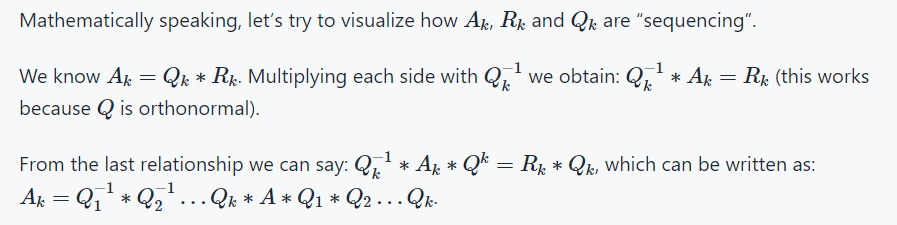
https://www.andreinc.net/2021/01/25/computing-eigenvalues-and-eigenvectors-using-qr-decomposition
**Convergence of Off-Diagonal Elements**: In the QR Algorithm, the repeated application of QR decomposition followed by the multiplication \( R_k Q_k \) results in the off-diagonal elements being 'squeezed out' progressively. This happens because the transformation tends to enhance the dominance of the diagonal elements (which approximate the eigenvalues) and diminish the magnitudes of off-diagonal elements which represent the interactions between different eigenmodes or eigenvectors.


In [90]:
def eigen_decomposition_by_QR_approximation(A, n_iter=1000):
    """the final Q and R will not reconstruct A doing Q@R, 
    but still have the eigenvalues approximated on the diagonal of R.
    Q_total is the eigenvectors, R is the eigenvalues diagonal matrix  
    
    returns: R, Q_total
    """
    Q_total = np.eye(A.shape[0])
    Q, R = QR_decomposition(A)
    Q_total = Q_total @ Q
    for i in range(n_iter):
        Q, R = QR_decomposition(R @ Q)
        Q_total = Q_total @ Q
    return R, Q_total #Q_total is the eigenvectors, R is the eigenvalues diagonal matrix


In [25]:
A = rng.integers(0, 20, (5, 5)).astype(float)
R , Q = eigen_decomposition_by_QR_approximation(A.T @ A, 2000) #avoid complex eigenvalues
A.T@A, R, Q

(array([[ 476.,  543.,  292.,  564.,  380.],
        [ 543.,  991.,  377., 1002.,  491.],
        [ 292.,  377.,  397.,  446.,  548.],
        [ 564., 1002.,  446., 1054.,  577.],
        [ 380.,  491.,  548.,  577.,  786.]]),
 array([[ 2.981e+03,  6.414e-14, -1.092e-13,  1.757e-14,  6.241e-14],
        [-2.343e-29,  5.618e+02, -8.041e-14, -6.501e-15, -2.097e-15],
        [-1.295e-28,  2.037e-29,  1.391e+02,  4.872e-14, -2.382e-14],
        [ 2.597e-28,  1.230e-29,  1.790e-29,  1.800e+01, -1.360e-14],
        [-4.128e-27, -2.412e-29, -4.676e-29, -2.155e-30,  4.556e+00]]),
 array([[ 0.344,  0.052, -0.935,  0.017,  0.062],
        [ 0.541,  0.433,  0.189, -0.594, -0.362],
        [ 0.304, -0.456,  0.045,  0.405, -0.731],
        [ 0.575,  0.307,  0.265,  0.593,  0.392],
        [ 0.408, -0.713,  0.132, -0.363,  0.421]]))

In [26]:
np.diag(R)

array([2980.541,  561.783,  139.122,   17.998,    4.556])

In [27]:
eig_vals, eig_vecs = np.linalg.eig(A.T @ A)
print(np.sort(eig_vals)[::-1])
print(eig_vecs)

[2980.541  561.783  139.122   17.998    4.556]
[[-0.344 -0.052 -0.935  0.062 -0.017]
 [-0.541 -0.433  0.189 -0.362  0.594]
 [-0.304  0.456  0.045 -0.731 -0.405]
 [-0.575 -0.307  0.265  0.392 -0.593]
 [-0.408  0.713  0.132  0.421  0.363]]


In [28]:
Z = np.diag(np.diag(R))
np.abs(Q @ R @ Q.T - A.T @ A) < .0001

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [29]:
Q @ R @ Q.T

array([[ 476.,  543.,  292.,  564.,  380.],
       [ 543.,  991.,  377., 1002.,  491.],
       [ 292.,  377.,  397.,  446.,  548.],
       [ 564., 1002.,  446., 1054.,  577.],
       [ 380.,  491.,  548.,  577.,  786.]])

In [30]:
B = np.array([[1, 5, 4], [3, 7,8], [33,22, 2]]).astype(float)
e_vals, e_vecs = np.linalg.eig(B)
vals, vecs = eigen_decomposition_by_QR_approximation(B, 10000)
e_vals, vals

(array([ 23.57 ,  -1.668, -11.902]),
 array([[ 2.357e+01, -2.527e+01,  1.648e+01],
        [-2.316e-15,  1.190e+01, -1.144e+01],
        [ 2.789e-14, -3.455e-14,  1.668e+00]]))

In [31]:
C = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]]).astype(float)
gaussian_elimination_rref_square(C, np.eye(C.shape[0]))

[[ 1.     0.     0.    -2.     1.     0.   ]
 [-0.     1.    -0.     2.5   -2.     0.5  ]
 [-0.    -0.     1.    -0.667  1.    -0.333]]


(array([[ 1.,  0.,  0.],
        [-0.,  1., -0.],
        [-0., -0.,  1.]]),
 array([[-2.   ,  1.   ,  0.   ],
        [ 2.5  , -2.   ,  0.5  ],
        [-0.667,  1.   , -0.333]]))

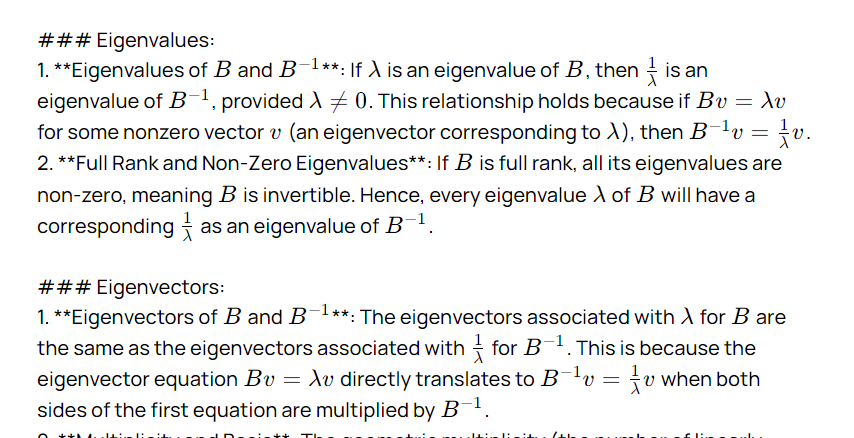
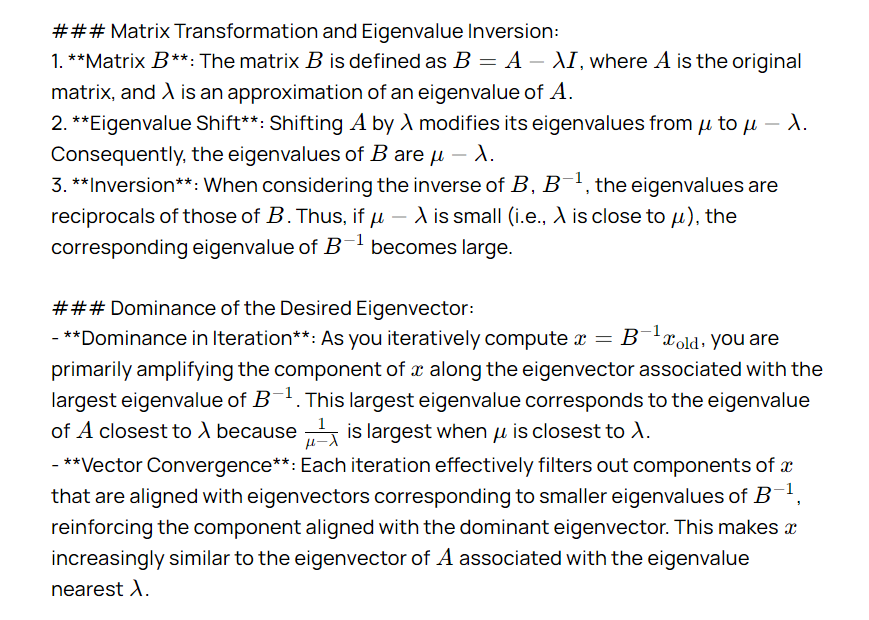
basically, shift a matrix A by a value very close to one of its eigenvalues create a new full rank matrix   
that will have the eigenvalues that is of the kind λ - shift  
the inverse of that matrix has eigenvalues that is 1/(λ-shift)  
becuase λ - shift is so small, the eigenvalues is so large,  
repeatedly solve B @ v_new = v_old equals repeatedly do  v_new = $B^{-1}$ @ v_old = 1/(λ-shift) * v_old  
because the eigenvalue 1/(λ-shift) is so dominant(big), 
the v_new will converge to the eigenvector of that eigenvalue regardless of its initialization value

In [32]:
def inverse_iteration(A, lambda_approx, num_iterations=10, shift=.01):
    # A = np.array([[4, 1], [2, 3]]).astype(float) #Specify the known eigenvalue
    # Identity matrix
    I = np.eye(A.shape[0])
    # Compute A - lambda * I
    """In the context of the inverse iteration method, the matrix (A - λI) becomes singular 
    when λ is an eigenvalue of A. This is because (A - λI) has a zero determinant when λ is an eigenvalue, 
    which is a characteristic property of eigenvalues.

    To avoid this issue, a common approach is to add a small shift σ to the eigenvalue λ when forming the matrix (A - λI). 
    This shift moves λ away from the exact eigenvalue, preventing (A - λI) from becoming singular. 
    The modified matrix becomes (A - (λ+σ)I), 
    and the inverse iteration method can proceed without encountering a singular matrix."""
    B = (A - (lambda_approx - shift) * I).astype(float)
    # Initial guess for the eigenvector
    x = np.random.rand(A.shape[0])
    x = x / np.linalg.norm(x)  # Normalize the initial vector

    # Inverse Iteration
    for _ in range(num_iterations):    
        x = np.linalg.solve(B, x)  # Solve Bx = x_old    
        x = x / np.linalg.norm(x)  # Normalize the vector
    # print("Approximate eigenvector:", x)
    return x

In [33]:
from sympy import symbols, Matrix, eye, solve, simplify, N, re
def eigendecomposition_test_return_eigenvalues_diagmatrix(A):    
    lamda = symbols('λ')        
    """N(x, 50) is used to evaluate each element of A to 50 decimal places, 
    and N(re(e)) is used to convert the eigenvalues to numerical values. 
    This should help to reduce numerical issues in the computation of the eigenvalues."""
    A = Matrix(A).applyfunc(lambda x: N(x, 50))  # Use higher precision    
    I = eye(A.shape[0])        
    # # Characteristic equation det(A - λI) = 0    
    characteristic_eq_matrix = A - lamda * I    
    poly = characteristic_eq_matrix.det()  
    eigenvalues = solve(poly, lamda)
    print('eigenvalues', eigenvalues)
    eigenvalues = np.array([N(re(e)) for e in eigenvalues])    
    eigenvalues = np.sort(eigenvalues)[::-1]    
# eigenvectors = []    
# for e_val in eigenvalues:        
# # Solve (A - λI)v = 0        
#     eig_vec = (A - e_val * I).nullspace() 
#     #unable to cal null space due to numerical issues
#     eigenvectors.append(eig_vec)        
# # # Form the matrix V from the eigenvectors    
# # # Flatten the list of eigenvectors and form a matrix    
# V = Matrix([vec[0] for vec in eigenvectors if vec]).T        
    D = Matrix.diag(*eigenvalues)    
    return D

In [34]:
C = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]]).astype(float)

D = eigendecomposition_test_return_eigenvalues_diagmatrix(C)
# V, D
evals = np.diag(D)
for i in evals:
    print(i)
    inverse_iteration(C, re(i), 10)

eigenvalues [-1.41120100507989 - 0.e-22*I, -0.271114156822444 + 0.e-22*I, 15.6823151619023 - 0.e-22*I]
15.6823151619023
-0.271114156822444
-1.41120100507989


In [35]:
eigen_decomposition_by_QR_approximation(C, 10000)

(array([[ 1.568e+01, -3.924e+00,  2.275e+00],
        [-5.204e-91,  1.411e+00, -6.517e-01],
        [-9.105e-91,  2.851e-16,  2.711e-01]]),
 array([[ 0.238,  0.495, -0.836],
        [ 0.491,  0.681,  0.543],
        [ 0.838, -0.54 , -0.081]]))

In [36]:
vals, vecs = np.linalg.eig(C)
vals, vecs

(array([15.682, -0.271, -1.411]),
 array([[-0.238, -0.48 , -0.429],
        [-0.491,  0.81 , -0.554],
        [-0.838, -0.337,  0.714]]))

In [37]:
def svd_pro(A):
    """The SVD is a factorization of a matrix A into three matrices U, Σ, and V such that A = UΣV^T. 
    The SVD is commonly used for dimensionality reduction, data compression, and solving linear least squares problems."""
    # Compute the eigenvectors and eigenvalues of A^TA
    eig_vals, eig_vecs = np.linalg.eig(A.T @ A)
    # Sort the eigenvectors and eigenvalues in descending order
    idx = np.argsort(eig_vals)[::-1]
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[:, idx]
    # Compute the singular values
    singular_vals = np.sqrt(eig_vals)
    # Compute the matrix U
    U = eig_vecs
    # Compute the matrix Σ
    Σ = np.diag(singular_vals)
    # Compute the matrix V
    V = np.linalg.inv(Σ) @ U.T @ A
    return U, Σ, V

In [79]:
def pad_diagonal_matrix(S_diag, shape):
    m, n = shape
    print(S_diag.shape, shape)
    assert np.all(np.array(shape) - np.array(S_diag.shape) >= np.array([0,0])), "shape must be less than diagonal matrix shape"
    S_padded = np.pad(S_diag, ((0, m - S_diag.shape[0]), (0, n - S_diag.shape[1])))

    return S_padded



In [80]:
z = np.diag([1, 2, 3])
pad_diagonal_matrix(z, (7, 3))

(3, 3) (7, 3)


array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [248]:
from sympy import re

def compute_Vs_from_Us(U, sigma, W):
    s_inv = np.diag(1/np.diag(sigma))
    # g_Us = W @ U @ s_inv
    g_Vs = W.T @ U[:, :-1] @ s_inv
    return g_Vs
def compute_Us_from_Vs(V, sigma, W):
    s_inv = np.diag(1/np.diag(sigma))
    g_Us = W @ V @ s_inv
    # g_Vs = W.T @ V[:, :-1] @ s_inv
    return g_Us
    
def svd_naive(A):
    AAt = A @ A.T
    AtA = A.T @ A
    
    #AAt decomposition:
    # D = eigendecomposition_test_return_eigenvalues_diagmatrix(AAt)
    # eig_values_AAt = np.diag(D)
    # eig_values_AAt = [re(val) for val in eig_values_AAt]
    rA_dim, cA_dim = A.shape
    psd_matrix = AAt if rA_dim <= cA_dim else AtA
    R, Q = eigen_decomposition_by_QR_approximation(psd_matrix, 1000)
    eig_values_AAt = np.diag(R)
    eig_vectors_AAt = []
    for eig_val in eig_values_AAt:
        eig_vecz = inverse_iteration(AAt, eig_val, 1000)
        eig_vectors_AAt.append(eig_vecz)
    # print(eig_vectors_AAt)   
    
    #AAt decomposition:
    # D = eigendecomposition_test_return_eigenvalues_diagmatrix(AtA)
    # eig_values_AtA = np.diag(D)
    # eig_values_AtA = [re(val) for val in eig_values_AtA]
    eig_vectors_AtA = []
    for eig_val in eig_values_AAt: #both eigenvalues are the same
        eig_vecz = inverse_iteration(AtA, eig_val, 1000)
        eig_vectors_AtA.append(eig_vecz)   
    # print(eig_vectors_AtA)
    
    #AtA decomposition: #implementation of QR algo but only for square matrices
    # R, Q = eigen_decomposition_by_QR_approximation(AtA, 1000)
    # V = Q
    
    
    sigma = np.diag(np.sqrt(np.array([e for e in eig_values_AAt if e != 0 ]).astype(float)))
    # print(sigma)
    if sigma.shape != A.shape:
        sigma = pad_diagonal_matrix(sigma, A.shape)
    # sigma_R = np.sqrt(R)
    eig_vectors_AAt = [vec.reshape(-1, 1) for vec in eig_vectors_AAt]
    U = np.hstack(eig_vectors_AAt)
    eig_vectors_AtA = [vec.reshape(-1, 1) for vec in eig_vectors_AtA]
    V = np.hstack(eig_vectors_AtA)
    
    s_inv = np.diag(1/np.diag(sigma))
    if rA_dim < cA_dim:
        additional_cols =  A.shape[1] - V.shape[1]
        V = add_orthogonal_columns(V, additional_cols) #wide matrix A case
        # U = compute_Us_from_Vs(V, sigma, A)
        g_Us = A @ V[:,:-additional_cols] @ s_inv
        U = g_Us
        
    elif rA_dim > cA_dim:
        additional_cols =  A.shape[0] - V.shape[1]
        U = add_orthogonal_columns(U, additional_cols) #tall matrix A case
        # V = compute_Vs_from_Us(U, sigma, A)
        g_Vs = A.T @ U[:, :-additional_cols] @ s_inv
        V = g_Vs
    else:
        # V = compute_Vs_from_Us(U, sigma, A)
        g_Vs = A.T @ U @ s_inv
        V = g_Vs
# #https://math.stackexchange.com/questions/2359992/how-to-resolve-the-sign-issue-in-a-svd-problem
    return U, sigma, V 
    

In [357]:
# W = rng.integers(1, 30, (4, 4)).astype(float)
# W = rng.normal(0, 1, (4, 4))
# Number of rows and columns
n_rows = 4
n_cols = 4

# Create an empty matrix
W = rng.integers(1, 5000, (7, 7)).astype(float)

# Fill each column with random values scaled by a different factor
# for i in range(n_cols):
#     W[:, i] = rng.integers(5, 20, n_rows) * i+3
np.set_printoptions(precision=3)

In [358]:
W

array([[2970.,  349., 2591., 1113., 4894., 4661., 4551.],
       [2845., 3464., 1772., 1710., 3395., 4212., 4733.],
       [ 433., 1385., 3009., 2758., 3197.,  234., 4468.],
       [2253.,  163., 1933., 3052., 1129., 2166.,  594.],
       [4568., 3740., 3117., 4580.,  566., 3905.,  145.],
       [2572., 4514., 4935., 2243.,  495., 1753., 1811.],
       [4334., 2883., 1410., 3602., 1026., 4840., 2421.]])

In [359]:
U_naive, sigma_naive, V_naive = svd_naive(W)
print(U_naive, sigma_naive, V_naive, sep='\n')

[[ 0.422 -0.543  0.313  0.127  0.582  0.02  -0.274]
 [ 0.441 -0.283  0.081 -0.539 -0.272 -0.351  0.48 ]
 [ 0.29  -0.394 -0.581  0.399 -0.459 -0.022 -0.229]
 [ 0.23   0.128  0.126  0.633  0.071  0.143  0.699]
 [ 0.422  0.565  0.082  0.183  0.017 -0.61  -0.3  ]
 [ 0.362  0.294 -0.623 -0.296  0.445  0.315  0.097]
 [ 0.425  0.22   0.383 -0.111 -0.416  0.62  -0.233]]
[[18989.703     0.        0.        0.        0.        0.        0.   ]
 [    0.     7102.434     0.        0.        0.        0.        0.   ]
 [    0.        0.     4898.487     0.        0.        0.        0.   ]
 [    0.        0.        0.     3208.873     0.        0.        0.   ]
 [    0.        0.        0.        0.     2265.699     0.        0.   ]
 [    0.        0.        0.        0.        0.      773.162     0.   ]
 [    0.        0.        0.        0.        0.        0.      133.112]]
[[ 0.414  0.28   0.332  0.011  0.147  0.108 -0.779]
 [ 0.345  0.335 -0.366 -0.666 -0.216 -0.377  0.045]
 [ 0.363  0.095 -0.

In [360]:
U, S, Vt = np.linalg.svd(W)
S_diag = pad_diagonal_matrix(np.diag(S), W.shape)
print(U, S_diag, Vt.T, sep='\n')

(7, 7) (7, 7)
[[-0.422 -0.543  0.313  0.127 -0.582 -0.02   0.274]
 [-0.441 -0.283  0.081 -0.539  0.272  0.351 -0.48 ]
 [-0.29  -0.394 -0.581  0.399  0.459  0.022  0.229]
 [-0.23   0.128  0.126  0.633 -0.071 -0.143 -0.699]
 [-0.422  0.565  0.082  0.183 -0.017  0.61   0.3  ]
 [-0.362  0.294 -0.623 -0.296 -0.445 -0.315 -0.097]
 [-0.425  0.22   0.383 -0.111  0.416 -0.62   0.233]]
[[18989.703     0.        0.        0.        0.        0.        0.   ]
 [    0.     7102.434     0.        0.        0.        0.        0.   ]
 [    0.        0.     4898.487     0.        0.        0.        0.   ]
 [    0.        0.        0.     3208.873     0.        0.        0.   ]
 [    0.        0.        0.        0.     2265.699     0.        0.   ]
 [    0.        0.        0.        0.        0.      773.162     0.   ]
 [    0.        0.        0.        0.        0.        0.      133.112]]
[[-0.414  0.28   0.332  0.011 -0.147 -0.108  0.779]
 [-0.345  0.335 -0.366 -0.666  0.216  0.377 -0.045]
 [-0.

In [361]:
# def sign_flip(X, U, V, S, tol = 1):

#     m, n = X.shape
#     U_flipped = U.copy()
#     V_flipped = V.copy()
#     # Step 1
#     s_lefts = []
#     # Y = X - U @ S @ V.T
#     Y = X
#     for k in range(len(U)):
#         # Y = X - U[:,:k+1] @ S[:k+1,:k+1] @ V[:,:k+1].T
#         # print('step 1: ', k)     
#         s_left = np.sum(np.sign(U[:,k].T @ Y)*((U[:,k].T @ Y)**2))
#         # s_left = np.sum(np.sign(U[:,k].T @ Y)*(np.abs(U[:,k].T @ Y)))
#         s_lefts.append(s_left)
        
#     # Step 2
#     s_rights = []
#     for k in range(len(V)):
#         # print('step 2: ', k)
#         # Y = X - U[:,:k+1] @ S[:k+1,:k+1] @ V[:,:k+1].T
#         s_right = np.sum(np.sign(V[:,k].T @ Y.T)*((V[:,k].T @ Y.T)**2))
#         # s_right = np.sum(np.sign(V[:,k].T @ Y.T)*(np.abs(V[:,k].T @ Y.T)))
#         s_rights.append(s_right)

#     # Step 3
#     print('s_lefts: ', s_lefts)
#     print('s_rights: ', s_rights)
#     for k in range(len(U)):
#         s_left = s_lefts[k]
#         s_right = s_rights[k]
#         if np.abs(s_left) < tol or np.abs(s_right) < tol:
#             print('skipped: k={0}, left={1}, right={2}'.format(k, s_left, s_right))
#             # continue
#         if s_left * s_right < 0 and not (np.abs(s_left) < tol or np.abs(s_right) < tol):
#             if np.abs(s_left) < np.abs(s_right):
#                 # s_left = s_lefts[k] = -s_left
#                 s_lefts[k] = -1
#                 s_rights[k] = 1
#             else:
#                 # s_right = s_rights[k] = -s_right
#                 s_lefts[k] = 1
#                 s_rights[k] = -1
#         else:
#             s_lefts[k] = 1
#             s_rights[k] = 1
                
#         U_flipped[:, k] = U[:, k] * np.sign(s_lefts[k])
#         V_flipped[:, k] = V[:, k] * np.sign(s_rights[k])
#     print('s_lefts: ', s_lefts)
#     print('s_rights: ', s_rights)
#     return U_flipped, V_flipped

In [362]:
# U_flipped, V_flipped = sign_flip(W, U_naive, V_naive, sigma_naive)
# U_flipped, U_naive, V_flipped, V_naive 

In [363]:
# U_flipped @ sigma_naive @ V_flipped.T

In [364]:
res = U_naive @ sigma_naive @ V_naive.T
res,W

(array([[2970.,  349., 2591., 1113., 4894., 4661., 4551.],
        [2845., 3464., 1772., 1710., 3395., 4212., 4733.],
        [ 433., 1385., 3009., 2758., 3197.,  234., 4468.],
        [2253.,  163., 1933., 3052., 1129., 2166.,  594.],
        [4568., 3740., 3117., 4580.,  566., 3905.,  145.],
        [2572., 4514., 4935., 2243.,  495., 1753., 1811.],
        [4334., 2883., 1410., 3602., 1026., 4840., 2421.]]),
 array([[2970.,  349., 2591., 1113., 4894., 4661., 4551.],
        [2845., 3464., 1772., 1710., 3395., 4212., 4733.],
        [ 433., 1385., 3009., 2758., 3197.,  234., 4468.],
        [2253.,  163., 1933., 3052., 1129., 2166.,  594.],
        [4568., 3740., 3117., 4580.,  566., 3905.,  145.],
        [2572., 4514., 4935., 2243.,  495., 1753., 1811.],
        [4334., 2883., 1410., 3602., 1026., 4840., 2421.]]))

In [365]:
res_pro = U @ S_diag @ Vt
res_pro

array([[2970.,  349., 2591., 1113., 4894., 4661., 4551.],
       [2845., 3464., 1772., 1710., 3395., 4212., 4733.],
       [ 433., 1385., 3009., 2758., 3197.,  234., 4468.],
       [2253.,  163., 1933., 3052., 1129., 2166.,  594.],
       [4568., 3740., 3117., 4580.,  566., 3905.,  145.],
       [2572., 4514., 4935., 2243.,  495., 1753., 1811.],
       [4334., 2883., 1410., 3602., 1026., 4840., 2421.]])

In [366]:
np.allclose(res, res_pro)

True